# TASK 1: Introduction

## **Dataset Descriptions**

### SYNTHETIC CIRCLES:

The **Synthetic Circle dataset** contains **10,000 points** arranged into **100 circular clusters**, each with 100 points.
Each data point has two numeric coordinates, `x` and `y`,and a **class label** that indicates which circle it belongs to.

* **Features:**

  * `x` → X-coordinate (continuous)
  * `y` → Y-coordinate (continuous)

* **Target:**

  * `class` → Integer label for the circle (0–99)

This dataset is mainly used to test how well **clustering algorithms** can identify circular or non-linear groupings.


**What “conflicting” means**

In this context, **“conflicting”** usually refers to **overlapping or hard-to-separate clusters**,
that is, when points from different circles lie close to each other or overlap in space.

Such conflicts make it **difficult for a clustering algorithm** to clearly distinguish which circle a point belongs to.


### BANK MARKETING:


## **Objective**
To apply and compare clustering algorithms on two real-world and synthetic datasets, explore the impact of dimensionality reduction on clustering performance, and develop skills in data preprocessing, visualization, and interpretation of results.

# TASK 2: Exploratory Data Analysis (EDA)

In [10]:
!which python
!python --version


/Users/nehapalak/.pyenv/versions/3.9.13/bin/python
Python 3.9.13


In [11]:
!pip install scikit-learn


  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 8.9 MB/s eta 0:00:00 0:00:01
Using cached joblib-1.5.2-py3-none-any.whl (308 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 11.9 MB/s eta 0:00:0000:0100:01
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)

[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [12]:
import sklearn
print(sklearn.__version__)


1.6.1


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler



df2: bank-full.csv is the correct one since its dimension matches with the assignment

In [3]:
circles = pd.read_csv('circles.csv')
bank = pd.read_csv('bank-full.csv', sep=';')

In [36]:
bank.shape

(45211, 17)

In [38]:
circles.head()


,x,y,class
0,3.15676,116.12252,6
1,16.14436,16.81660,11
2,100.31212,64.99025,53
3,-1.33773,84.81772,4
4,104.37328,62.42373,53


In [19]:
# Shape of dataset
print("\nShape of dataset:", circles.shape)

# Summary info
print("Dataset Info:")
circles.info()



Shape of dataset: (10000, 3)
Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10000 non-null  float64
 1   y       10000 non-null  float64
 2   class   10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


In [17]:
print("\nMissing values count per column:")
print(circles.isnull().sum())


Missing values count per column:
x        0
y        0
class    0
dtype: int64


In [16]:
#Statistics of the dataset
circles.describe()

,x,y,class
count,10000.000000,10000.000000,10000.000000
mean,89.981670,90.003827,49.500000
std,57.457467,57.559719,28.867513
min,-5.000000,-4.999860,0.000000
25%,40.237885,40.133840,24.750000
50%,89.999995,90.000080,49.500000
75%,139.898800,139.977695,74.250000
max,184.999920,185.000000,99.000000


In [11]:
print("Column Data Types:\n")
print(circles.dtypes)
print("\nUnique classes:", circles['class'].nunique())
print("Classes range from", circles['class'].min(), "to", circles['class'].max())


Column Data Types:

x        float64
y        float64
class      int64
dtype: object

Unique classes: 100
Classes range from 0 to 99


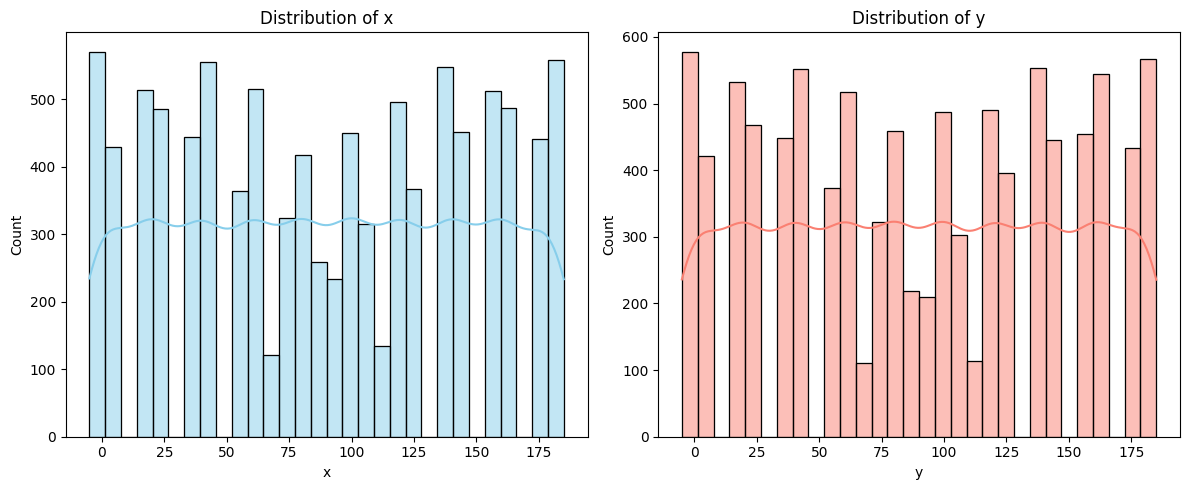

In [13]:
# Distribution of x and y
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.histplot(circles['x'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("Distribution of x")

sns.histplot(circles['y'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title("Distribution of y")

plt.tight_layout()
plt.show()


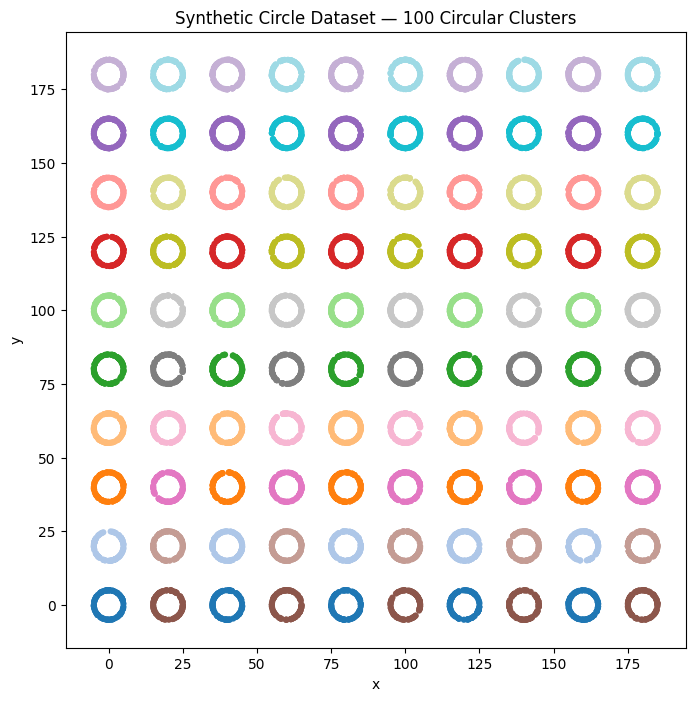

In [20]:
#Visualising Circles through scatterplot
plt.figure(figsize=(8, 8))
sns.scatterplot(data=circles, x='x', y='y', hue='class', palette='tab20', s=20, linewidth=0)
plt.title("Synthetic Circle Dataset — 100 Circular Clusters")
plt.legend([],[], frameon=False)  # hide legend if too many classes
plt.show()


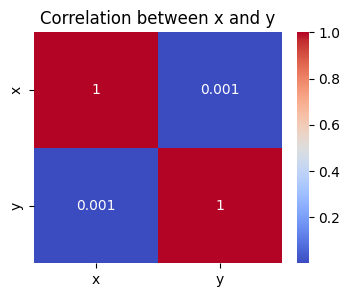

In [21]:
#Correlation Analysis
corr = circles[['x', 'y']].corr()

# Heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation between x and y")
plt.show()


In [22]:
#Data Quality Analysis

# Duplicate rows
print("Number of duplicate rows:", circles.duplicated().sum())

# Check for any extreme values (potential outliers)
print("\nExtreme x values:", circles['x'].min(), "to", circles['x'].max())
print("Extreme y values:", circles['y'].min(), "to", circles['y'].max())


Number of duplicate rows: 0

Extreme x values: -5.0 to 184.99992
Extreme y values: -4.99986 to 185.0


## Observations made through EDA

### SYNTHETIC CIRCLES
* 10,000 samples, 2 continuous features (x, y), and 1 target variable (class)

* No missing or duplicate values

* 'x' and 'y' are evenly distributed across a wide range

* 100 balanced classes (each circle has 100 points)

* Correlation between x and y ≈ 0 (non-linear pattern)

* Visualization confirms 100 circular clusters, with slight overlaps (conflicts) between neighboring circles

* Dataset is clean and suitable for clustering experiments


### BANK MARKETING




# TASK 3: Preprocessing
### Synthetic Circles

In [ ]:
# Preprocessing
from sklearn.preprocessing import StandardScaler

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture

# Evaluation metrics
from sklearn.metrics import silhouette_score, davies_bouldin_score

* The dataset has no missing values, so imputation or removal is not needed

In [4]:
# One-hot encode the 'class' column (optional)
circles_encoded = pd.get_dummies(circles, columns=['class'])
circles_encoded.head()


,x,y,class_0,class_1,class_2,class_3,class_4,class_5,class_6,class_7,...,class_90,class_91,class_92,class_93,class_94,class_95,class_96,class_97,class_98,class_99
0,3.15676,116.12252,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,16.14436,16.81660,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,100.31212,64.99025,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,-1.33773,84.81772,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,104.37328,62.42373,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Scale x and y
circles[['x', 'y']] = scaler.fit_transform(circles[['x', 'y']])

# Check scaled values
circles.head()


,x,y,class
0,-1.511192,0.453790,6
1,-1.285142,-1.271564,11
2,0.179802,-0.434589,53
3,-1.589419,-0.090104,4
4,0.250487,-0.479180,53


In [15]:
circles['distance_from_origin'] = np.sqrt(circles['x']**2 + circles['y']**2)


* Feature selection not needed since there are only 2 features
* Sampling / Undersampling is not needed since dataset is balanced across classes.

### Bank Marketing

# TASK 4: Clustering Methods
### Synthetic Circles

In [17]:
#Scaling features

scaler = StandardScaler()
circles[['x', 'y']] = scaler.fit_transform(circles[['x', 'y']])



#### Method 1: K-Means Clustering
Step 1a: Choose Hyperparameters

* n_clusters = 100 → because the dataset has 100 circles

* init = 'k-means++' → good default initialization

* random_state = 42 → for reproducibility

In [18]:
kmeans = KMeans(n_clusters=100, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(circles[['x', 'y']])


Step 1b: Visualize Clusters

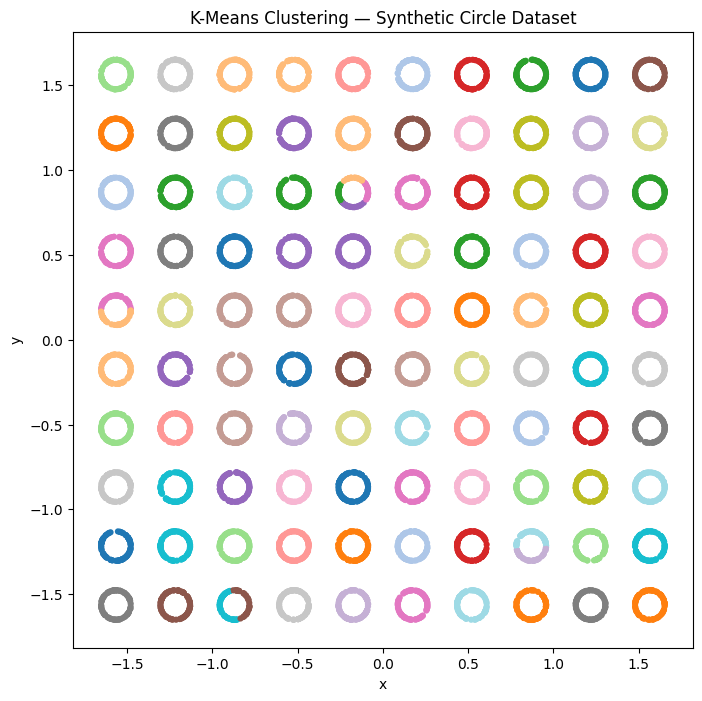

In [19]:
plt.figure(figsize=(8, 8))
sns.scatterplot(x=circles['x'], y=circles['y'], hue=kmeans_labels, palette='tab20', s=20, linewidth=0)
plt.title("K-Means Clustering — Synthetic Circle Dataset")
plt.legend([], [], frameon=False)  # Hide legend for clarity
plt.show()


Step 1c: Evaluate Clusters

In [20]:
sil_score = silhouette_score(circles[['x', 'y']], kmeans_labels)
db_score = davies_bouldin_score(circles[['x', 'y']], kmeans_labels)

print("K-Means Silhouette Score:", sil_score)
print("K-Means Davies-Bouldin Index:", db_score)


K-Means Silhouette Score: 0.590122943393455
K-Means Davies-Bouldin Index: 0.5469307901035961
